In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
class_to_emotion = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
emotions = class_to_emotion.values()

In [3]:
cm = np.array([[28680, 82, 55, 843, 602, 34],
            [119, 34595, 36, 116, 63, 337],
            [59, 2710, 5789, 39, 23, 19],
            [89, 50, 8, 13545, 611, 25],
              [38, 36, 5, 86, 10723, 1039],
              [21, 8, 0, 1, 14, 3699]
              ])
cm

array([[28680,    82,    55,   843,   602,    34],
       [  119, 34595,    36,   116,    63,   337],
       [   59,  2710,  5789,    39,    23,    19],
       [   89,    50,     8, 13545,   611,    25],
       [   38,    36,     5,    86, 10723,  1039],
       [   21,     8,     0,     1,    14,  3699]])

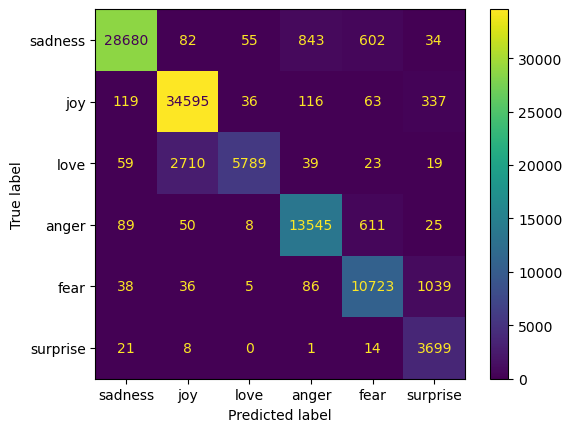

In [6]:
disp = ConfusionMatrixDisplay(cm, display_labels=emotions)
disp.plot()

In [9]:
class_no = np.zeros(shape=(len(emotions), 1))
for i, row in enumerate(cm):
    class_no[i] = np.sum(row)
class_no

array([[30296.],
       [35266.],
       [ 8639.],
       [14328.],
       [11927.],
       [ 3743.]])

In [16]:
precision = np.zeros(shape=(len(emotions), 1))
recall = np.zeros(shape=(len(emotions), 1))
f1_score = np.zeros(shape=(len(emotions), 1))
for i in range(len(emotions)): # for each class
    # calculate precison
    TP = cm[i,i]
    FN = np.sum(cm[i,:]) - cm[i,i]
    FP = np.sum(cm[:,i]) - cm[i,i]
    recall[i] = TP/(TP+FN)
    precision[i] = TP/(TP+FP)
    f1_score[i] = 2*precision[i]*recall[i]/(precision[i]+recall[i])

print(emotions)
print("Precision = ", precision.T)
print("Recall = ", recall.T)
print("f1_score = ", f1_score.T)

dict_values(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
Precision =  [[0.98876095 0.92300099 0.98235194 0.92583732 0.8909106  0.71783427]]
Recall =  [[0.94665963 0.98097318 0.67010071 0.94535176 0.89905257 0.98824472]]
f1_score =  [[0.96725237 0.95110451 0.79672447 0.93549278 0.89496307 0.83160971]]


In [19]:
# weighted values:
print("Weighted avg precision = ", np.sum(class_no*precision)/class_no.sum())
print("Weighted avg recall = ", np.sum(class_no*recall)/class_no.sum())
print("Weighted avg f1_score = ", np.sum(class_no*f1_score)/class_no.sum())

Weighted avg precision =  0.936388395476935
Weighted avg recall =  0.9312085528651907
Weighted avg f1_score =  0.930134766006372


In [21]:
# # checking
# cm = np.array([[27599, 602, 138, 1046, 785, 126],
#             [729, 31234, 2146, 402, 351, 404],
#             [181, 2939, 5359, 77, 54, 29],
#             [919, 222, 38, 12531, 589, 29],
#               [631, 168, 17, 698, 9563, 850],
#               [56, 341, 9, 24, 887, 2426]
#               ])
# precision = np.zeros(shape=(len(emotions), 1))
# recall = np.zeros(shape=(len(emotions), 1))
# f1_score = np.zeros(shape=(len(emotions), 1))
# for i in range(len(emotions)): # for each class
#     # calculate precison
#     TP = cm[i,i]
#     FN = np.sum(cm[i,:]) - cm[i,i]
#     FP = np.sum(cm[:,i]) - cm[i,i]
#     recall[i] = TP/(TP+FN)
#     precision[i] = TP/(TP+FP)
#     f1_score[i] = 2*precision[i]*recall[i]/(precision[i]+recall[i])

# print(emotions)
# print("Precision = ", precision.T)
# print("Recall = ", recall.T)
# print("f1_score = ", f1_score.T)

# # weighted values:
# print("Weighted avg precision = ", np.sum(class_no*precision)/class_no.sum())
# print("Weighted avg recall = ", np.sum(class_no*recall)/class_no.sum())
# print("Weighted avg f1_score = ", np.sum(class_no*f1_score)/class_no.sum())

dict_values(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
Precision =  [[0.91645359 0.87968231 0.6953419  0.84794965 0.78199362 0.62784679]]
Recall =  [[0.91097835 0.88566892 0.62032643 0.87458124 0.80179425 0.6481432 ]]
f1_score =  [[0.91370777 0.88266546 0.65569558 0.86105958 0.79177016 0.63783357]]
Weighted avg precision =  0.8504986047342729
Weighted avg recall =  0.851370934461943
Weighted avg f1_score =  0.8507033676855513


In [22]:
# random oversampling
cm = np.array([[28689, 56, 82, 828, 592, 49],
            [112, 31875, 2694, 155, 73, 357],
            [54, 72, 8443, 40, 12, 18],
            [82, 38, 23, 13743, 426, 169],
              [25, 28, 18, 263, 10560, 1033],
              [2, 8, 2, 2, 46, 3683]
              ])
precision = np.zeros(shape=(len(emotions), 1))
recall = np.zeros(shape=(len(emotions), 1))
f1_score = np.zeros(shape=(len(emotions), 1))
for i in range(len(emotions)): # for each class
    # calculate precison
    TP = cm[i,i]
    FN = np.sum(cm[i,:]) - cm[i,i]
    FP = np.sum(cm[:,i]) - cm[i,i]
    recall[i] = TP/(TP+FN)
    precision[i] = TP/(TP+FP)
    f1_score[i] = 2*precision[i]*recall[i]/(precision[i]+recall[i])

print(emotions)
print("Precision = ", precision.T)
print("Recall = ", recall.T)
print("f1_score = ", f1_score.T)

# weighted values:
print("Weighted avg precision = ", np.sum(class_no*precision)/class_no.sum())
print("Weighted avg recall = ", np.sum(class_no*recall)/class_no.sum())
print("Weighted avg f1_score = ", np.sum(class_no*f1_score)/class_no.sum())

dict_values(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
Precision =  [[0.99050546 0.99370265 0.74968922 0.91431043 0.90187036 0.69372763]]
Recall =  [[0.94695669 0.90384506 0.97731219 0.94903667 0.8853861  0.98397008]]
f1_score =  [[0.96824165 0.94664627 0.84850008 0.93134996 0.89355221 0.81374282]]
Weighted avg precision =  0.9403382588892161
Weighted avg recall =  0.9294503535512149
Weighted avg f1_score =  0.9318331975533646


In [23]:
# smote oversampling
cm = np.array([[28513, 84, 159, 434, 610, 496],
            [65, 33765, 372, 95, 79, 890],
            [72, 2415, 5925, 36, 26, 165],
            [464, 66, 48, 13174, 331, 245],
              [78, 59, 27, 421, 10291, 1051],
              [13, 32, 0, 1, 166, 3531]
              ])
precision = np.zeros(shape=(len(emotions), 1))
recall = np.zeros(shape=(len(emotions), 1))
f1_score = np.zeros(shape=(len(emotions), 1))
for i in range(len(emotions)): # for each class
    # calculate precison
    TP = cm[i,i]
    FN = np.sum(cm[i,:]) - cm[i,i]
    FP = np.sum(cm[:,i]) - cm[i,i]
    recall[i] = TP/(TP+FN)
    precision[i] = TP/(TP+FP)
    f1_score[i] = 2*precision[i]*recall[i]/(precision[i]+recall[i])

print(emotions)
print("Precision = ", precision.T)
print("Recall = ", recall.T)
print("f1_score = ", f1_score.T)

# weighted values:
print("Weighted avg precision = ", np.sum(class_no*precision)/class_no.sum())
print("Weighted avg recall = ", np.sum(class_no*recall)/class_no.sum())
print("Weighted avg f1_score = ", np.sum(class_no*f1_score)/class_no.sum())

dict_values(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
Precision =  [[0.97630543 0.92707504 0.90721176 0.93030153 0.89463618 0.55362183]]
Recall =  [[0.94114735 0.95743776 0.68584327 0.9194584  0.86283223 0.94336094]]
f1_score =  [[0.95840406 0.9420118  0.781147   0.92484819 0.87844644 0.69775714]]
Weighted avg precision =  0.9230575392040499
Weighted avg recall =  0.9136268102381021
Weighted avg f1_score =  0.9150307294346767
